In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 1.7 MB 12.7 MB/s 
     |████████████████████████████████| 6.0 MB 38.2 MB/s 
     |████████████████████████████████| 439 kB 57.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt

In [4]:
#data preprocessing

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
#loading the datasets.
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


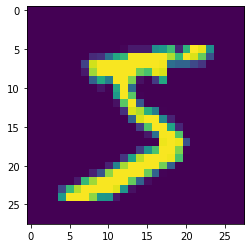

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [10]:
#there are 60000 images in x_train and size of each image is 28 x 28.
#there are 60000 entries in y_train.

In [11]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [12]:
#there are 10000 images in x_test.

In [13]:
x_train.min(),x_train.max()

(0, 255)

In [14]:
y_train.min(),y_train.max()

(0, 9)

In [15]:
#y_train contains digit recognized from 0 to 9.

In [16]:
#normalizing the images.
x_train=x_train/255.0
x_test=x_test/255.0

In [17]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [18]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
#the images have dimensions as 28 x 28.
#the convolution class we use here has 3 dimensions so we need to reshape
#our images.
#reshape the images.
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#above statements convert it into 3 dimensional figures
#28 x 28 x 1.

In [20]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [21]:
#input_shape that we will enter in 1st convolution layer.
input_shape = x_train[0].shape
print(input_shape)

(28, 28, 1)


In [22]:
#the above dimensions we enter in the 1st convolution layer.
#building the model
model=tf.keras.models.Sequential()

In [23]:
#adding 1st convolution layer.
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
#adding 2nd CNN layer.
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
#adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))
#adding flatten layer
model.add(tf.keras.layers.Flatten())
#fully connected layer(dense layer)
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
#output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [25]:
#dimension of output shape decreases.
#pooling layer decreases the sizeof images.

In [26]:
#compiling the model.
#adam is stochastic gradient descent algorithm.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [27]:
#training the model.
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 172s 364ms/step - loss: 0.1653 - sparse_categorical_accuracy: 0.9503 - val_loss: 0.0539 - val_sparse_categorical_accuracy: 0.9826
Epoch 2/10
469/469 [==============================] - 151s 323ms/step - loss: 0.0531 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0390 - val_sparse_categorical_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 160s 342ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0319 - val_sparse_categorical_accuracy: 0.9898
Epoch 4/10
469/469 [==============================] - 187s 399ms/step - loss: 0.0266 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0358 - val_sparse_categorical_accuracy: 0.9892
Epoch 5/10
469/469 [==============================] - 171s 365ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9933 - val_loss: 0.0325 - val_sparse_categorical_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 179s 382ms/step - loss: 0.

In [29]:
#y_pred=model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
#model predictions

313/313 [==============================] - 6s 20ms/step


In [30]:
y_pred[3],y_test[3] #checking predicted and actual value.

(0, 0)

In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    4 1020    0    1    0    0    6    0    0]
 [   0    0    1 1005    0    2    0    1    1    0]
 [   0    0    0    0  975    0    3    0    0    4]
 [   1    0    0    6    0  884    1    0    0    0]
 [   3    5    0    1    1    2  946    0    0    0]
 [   0    3    4    1    0    0    0 1013    1    6]
 [   2    0    3    2    0    2    0    2  958    5]
 [   0    0    0    2    7    5    0    2    0  993]]


In [32]:
#the diagonal matrix has the correct values as confusion matrix is the matrtix
#of predicted vs actual values.

In [33]:
acc_cm=accuracy_score(y_test,y_pred) #accuracy score by confusion matrix
print(acc_cm)

0.9905


In [34]:
#plotting the learning curves.
def learning_curve(history,epoch):
  #training vs validation accuracy
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

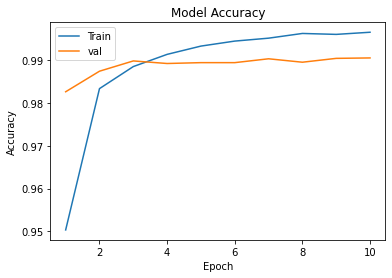

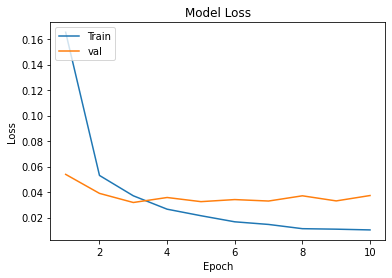

In [35]:
learning_curve(history,10) #2nd arguement is epoch.

In [36]:
#learning curve graph shows x-axis has epoch and y-axis has accuracy.
#from graph as training accuracy increases the validation accuacy
#also increases.So our model is not overfitted.
#from graph as training loss decreases the validation loss also decreases slightly
#or remains constant. So our model is neither overfitted nor underfitted.

In [ ]:
#ACCURACY SCORE: 0.9905